# **Összefüggésvizsgálat**
Fogarassyné Vathy Ágnes

Az összefüggésvizsgálat módszereinek átteintéséhez olvassuk be az *iris* adathalmazt és a szükséges csomagokat.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=['slength', 'swidth', 'plength', 'pwidth'])
iris['iclass'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

iris

,slength,swidth,plength,pwidth,iclass
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## **1. Folytonos és ordinális adatok összefüggésvizsgálata**

A változók közti korreláció könnyen kiszámítható a *pandas* csomag **corr** függvényével. A korreláció típusát a *method* paraméterében definiálhatjuk, amely lehet:   
- 'pearson'
- 'spearman'
- 'kendall'

### **1.1 Pearson korreláció**

**Blokk 1.1** Két attribútum értékei közti korreláció mértékét a következőképpen számíttathatjuk ki:

In [2]:
iris['slength'].corr(iris['swidth'])

np.float64(-0.11756978413300208)

**Blokk 1.2** A DataFrame összes folytonos értékű attribútuma közt számított korrelációs együtthatókat a korrelációs mátrixban jeleníthetjük meg:

In [3]:
iris_numeric = iris.select_dtypes(include=[float])
iris_numeric.corr(method='pearson')

,slength,swidth,plength,pwidth
slength,1.000000,-0.117570,0.871754,0.817941
swidth,-0.117570,1.000000,-0.428440,-0.366126
plength,0.871754,-0.428440,1.000000,0.962865
pwidth,0.817941,-0.366126,0.962865,1.000000


**Blokk 1.3** A korrelációs mátrix könnyebben áttekinthető, ha az értékeket hőtérképen is vizualizáljuk:

In [4]:
iris_numeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=None)

,slength,swidth,plength,pwidth
slength,1.0,-0.12,0.87,0.82
swidth,-0.12,1.0,-0.43,-0.37
plength,0.87,-0.43,1.0,0.96
pwidth,0.82,-0.37,0.96,1.0


**Blokk 1.4** Az összefüggések áttekintésekor nagyobb adathalmaz esetén gyakorta elegendő a hőtérképet megjeleníteni. Ennek első lépése maga a hőtérkép kirajzolása. A hőtérképeken használatos colormap-ek [itt](https://matplotlib.org/examples/color/colormaps_reference.html) tekinthetők meg.

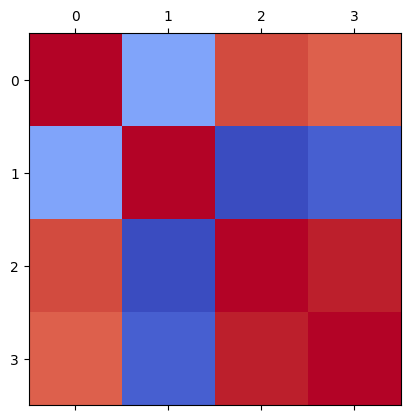

In [5]:
plt.matshow(iris_numeric.corr(method='pearson'), cmap='coolwarm')
plt.show()

**Blokk 1.5** A közérthetőséget nagy mértékben befolyásolja, hogy pontosan tudjuk-e értelmezni az egyes színek jelentését. Ezért mindenképpen ajánlatos a *colorbar* elhelyezése a grafikonon.

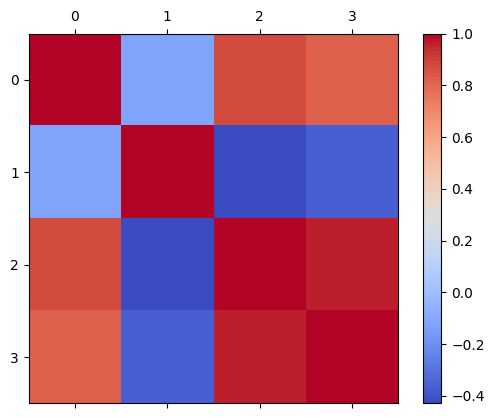

In [6]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
cax = ax.matshow(iris_numeric.corr(method='pearson'), cmap='coolwarm')
ax.xticklabels=iris[1:4]
fig1.colorbar(cax)
plt.show()

**Blokk 1.6** Hasonló eredményt kapunk a **seaborn** csomag **heatmap** metódusával is, kissé rövidebb formában:

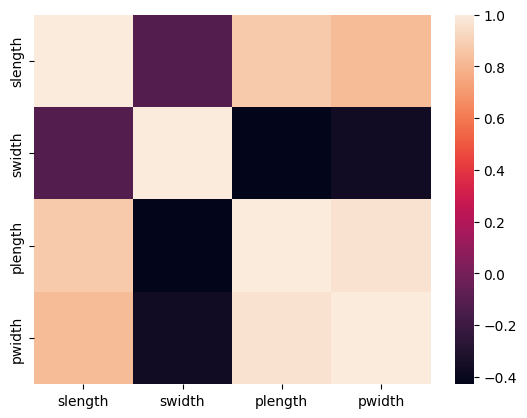

In [7]:
import seaborn as sns
corr_result = iris_numeric.corr(method='pearson')
sns.heatmap(corr_result,
            xticklabels=corr_result.columns.values,
            yticklabels=corr_result.columns.values)
plt.show()

### **1.2 Spearman rangkorreláció**

**Blokk 1.7** A Spearman-féle rangkorreláció könnyen számítható szintén a **df.corr** függvény segítségével:

In [8]:
df1 = pd.DataFrame()
df1['Jövedelmezoseg'] = [8, 10, 9, 5, 2, 7, 3, 4, 1, 6]
df1['Likviditas'] = [5, 8, 10, 4, 3, 7, 1, 6, 2, 9]
df1

,Jövedelmezoseg,Likviditas
0,8,5
1,10,8
2,9,10
3,5,4
4,2,3
5,7,7
6,3,1
7,4,6
8,1,2
9,6,9


In [9]:
df1.corr(method='spearman')

,Jövedelmezoseg,Likviditas
Jövedelmezoseg,1.000000,0.793939
Likviditas,0.793939,1.000000


### **1.3 Kendall rangkorreláció**

**Blokk 1.8** Hasonló a helyzet a Kendall rangkorreláció számításával is:

In [10]:
df1.corr(method='kendall')

,Jövedelmezoseg,Likviditas
Jövedelmezoseg,1.0,0.6
Likviditas,0.6,1.0


## **2. Nominális/bináris adatok összefüggésvizsgálata**

### **2.1 Khí-négyzet próba**

A khí-négyzet próba elvégzéséhez tekintsük a bukósisak színe és a balesetek összefüggését vizsgáló példát:

|           | Fekete |  Fehér | Piros |
| ----------|:------:| :-----:| :------------:|
| Kontroll  | 491    | 377    | 31            |
| Balestes  | 213    | 112    | 8             |

**Blokk 2.1** A khí négyzet próba a **scipy.stats** csomag **chi2_contingency** függvényével végezhető el:

In [11]:
import scipy.stats as stats

obs = np.array([[491, 377, 31], [213, 112, 8]])
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2 = ' + str(chi2))
print('p = ' + str(p))
print('degree of freedom = ' + str(dof))
print('expected values = ')
print(expected)

chi2 = 8.77471206682259
p = 0.012433559716419771
degree of freedom = 2
expected values = 
[[513.71428571 356.82711039  28.4586039 ]
 [190.28571429 132.17288961  10.5413961 ]]


### **2.2 Cramer-féle V**

**Blokk 2.2** Számoljuk ki az előző példához kapcsolódóan a Cramer-féle V értéket!

In [12]:
obs = np.array([[491, 377, 31], [213, 112, 8]])

# Chi-square statistics
chi2, p, dof, expected = stats.chi2_contingency(np.array(obs))
n = obs.sum()
c = obs.shape[1]
r = obs.shape[0]

# Cramer's V
V = np.sqrt(chi2 / (n * min(c - 1, r - 1)))

print (f'V érték: {V}')
print(f'p-érték: {p}')

V érték: 0.08439390512987466
p-érték: 0.012433559716419771


> A számított V érték egy mérsékelt összefüggést mutat.

### **2.3 Fisher-féle egzakt teszt**

**Blokk 2.3** Számoljuk ki két, kis mintaszámú bináris változóhoz kapcsolódóan a Fisher-féle egzakt teszt *p* értékét!

In [13]:
from scipy.stats import chi2_contingency

# Példa bináris adatok
data_binary = {'var1': [0, 1, 1, 1, 0, 1, 0, 1],
               'var2': [0, 1, 0, 1, 0, 1, 1, 1]}

df_binary = pd.DataFrame(data_binary)

# Kontingencia-táblázat létrehozása
contingency_table = pd.crosstab(df_binary['var1'], df_binary['var2'])

# Fisher-féle egzakt teszt futtatása
odds_ratio, p = stats.fisher_exact(contingency_table)

# Eredmények kiírása
print("Esélyhányados (Odds Ratio):", odds_ratio)
print("p-érték (p-value):", p)

Esélyhányados (Odds Ratio): 8.0
p-érték (p-value): 0.4642857142857143


### **2.4 Phi együttható**

**Blokk 2.4** Nézzünk egy példát a Phi korrelációs együttható számítására! (bináris-bináris)

In [14]:
from scipy.stats import chi2_contingency

# Példa bináris adatok
data_binary = {'var1': [0, 1, 1, 1, 0, 1, 0, 1],
               'var2': [0, 1, 0, 1, 0, 1, 1, 1]}

df_binary = pd.DataFrame(data_binary)

# Kontingencia-táblázat létrehozása
contingency_table = pd.crosstab(df_binary['var1'], df_binary['var2'])

# Chi-négyzet próba futtatása
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Phi korrelációs együttható kiszámítása
phi_corr = (chi2 / len(df_binary)) ** 0.5

print(f'Phi korrelációs együttható: {phi_corr}')
print(f'p-érték: {p}')

Phi korrelációs együttható: 0.2
p-érték: 0.5716076449533314


> Láthatjuk, hogy a Fisher-féle *p* és a Phi együttható (gyakorlatliag a Khí-négyzet) *p* értéke nem azonos, hanem eltér. Ennek oka a kis mintaszám. Mifel a Phi együttható Khí-négyzet alapon számítódik, ezért alkalmazásának feltétele ugyanaz, mint a Khí-négyzet tesztnek. Vagyis jelen esetben nem szabadna alkalmazni...

**Blokk 2.5** Nézzünk egy példát amikor a Phi együttható valóban számolható és vessük össze a *p* értékét a Fisher-féle *p* értékkel!

In [15]:
# Példa kontingenciatáblázat (2x2)
# Kezelés (A) és Kontroll (B) eredmények
#           | Esemény | Nincs esemény |
# ------------------------------------
# Kezelés A |    200    |       250       |
# Kontroll B|    150    |       300       |

# A kontingenciatáblázat adatainak definiálása
table = [[200, 250], [150, 300]]


# Fisher-féle egzakt teszt futtatása
odds_ratio, p_fisher = stats.fisher_exact(table)

# Chi-négyzet próba futtatása
chi2, p_khi, dof, expected = chi2_contingency(table)
# Phi korrelációs együttható kiszámítása
total_sum = sum(sum(row) for row in table)
phi_corr = (chi2 / total_sum) ** 0.5

# Eredmények kiírása
print(f'Fisher-féle p-érték: {p_fisher}')
print(f'Chi-négyzet p-érték: {p_khi}')
print(f'Phi korrelációs együttható: {phi_corr}')

Fisher-féle p-érték: 0.0007956775982188068
Chi-négyzet p-érték: 0.0008068301048482669
Phi korrelációs együttható: 0.1116813649304452


> Itt már láthatjuk, hogy a két *p* érték közel ugyanaz. Az eltérés oka, hogy a Khí-négyzet teszt közelítést használ, a Fisher-féle teszt viszont egzakt, így a Fisher-féle *p* értéket tekinthetjük pontosabbnak.

## **3. Vegyes típusú adatok összefüggésvizsgálata**

### **3.1 Point-biserial**

**Blokk 3.1** Nézzünk egy példát a point-biserial korrelációs együttható számítására! (bináris-folytonos)

In [16]:
from scipy.stats import pointbiserialr

# Bináris változó
binary_variable = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

# Folytonos változó
continuous_variable = np.array([2.5, 3.6, 2.9, 1.2, 3.7, 1.8, 4.1, 1.5, 3.9, 2.0])

# Point-biserial korreláció kiszámítása
corr, p_value = pointbiserialr(binary_variable, continuous_variable)

print(f'Point-biserial korreláció: {corr}')
print(f'p-érték: {p_value}')

Point-biserial korreláció: 0.9075609050740561
p-érték: 0.00028535984408666943


### **3.2 Rank-biserial**

**Blokk 3.2** Nézzünk egy példát a rank-biserial korrelációs együttható számítására! (bináris-ordinális)

In [17]:
from scipy.stats import mannwhitneyu

# Bináris változó
binary_variable = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

# Ordinális változó
ordinal_variable = np.array([5, 7, 8, 3, 9, 4, 6, 2, 10, 1])

# A két csoport létrehozása a bináris változó alapján
group1 = ordinal_variable[binary_variable == 0]
group2 = ordinal_variable[binary_variable == 1]

# Mann-Whitney U teszt futtatása
U_statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

# Rank-biserial korreláció kiszámítása
n1 = len(group1)
n2 = len(group2)
rank_biserial_corr = 1 - (2 * U_statistic) / (n1 * n2)

# Eredmények kiírása
print(f'Rank-biserial korreláció: {rank_biserial_corr}')
print(f'p-érték: {p_value}')

Rank-biserial korreláció: 1.0
p-érték: 0.007936507936507936
